In [120]:
import pandas as pd
import numpy as np
import json
import seaborn as sns


In [121]:
with open('primed_qtable.json', 'r') as file:
    data = json.load(file)

In [122]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6
0,0.730869,0.708569,0.095931,0.280404,0.454817,0.309406,0.248359
1,0.930778,0.954873,0.492477,0.500506,0.726277,0.725075,0.378110
2,0.101587,0.149501,0.778042,0.132020,0.624651,0.798704,0.450076
3,0.929667,0.009356,0.493607,0.237723,0.144024,0.252783,0.317030
4,0.392232,0.981843,0.186449,0.496747,0.728064,0.011346,0.250326
...,...,...,...,...,...,...,...
21627,0.081746,0.542628,0.951121,0.824059,0.804055,0.936700,0.289088
21628,0.796450,0.562740,0.417626,0.998388,0.932081,0.026824,0.795030
21629,0.550811,0.368065,0.789012,0.160819,0.051453,0.584951,0.527541
21630,0.157836,0.697480,0.488632,0.892682,0.365924,0.984285,0.220077


In [140]:
import pickle
HEIGHT= 26
WIDTH = 26
def load_qtable(filename="qtable.pkl"):
    with open(filename, "rb") as f:
        qtable = pickle.load(f)
    return qtable

q_table = load_qtable()

In [141]:
q_table

,0,1,2,3,4,5,6
0,0.402545,0.817120,0.063028,0.153940,0.585660,0.976677,0.936350
1,0.949814,0.888980,0.095146,0.228833,0.535110,0.251932,0.102882
2,0.847261,0.003702,0.356991,0.368978,0.303009,0.072461,0.754028
3,0.359456,0.885516,0.376286,0.016856,0.942949,0.308161,0.763218
4,0.150192,0.189216,0.503339,0.317672,0.108608,0.244490,0.776937
...,...,...,...,...,...,...,...
5403,0.175485,0.988055,0.466255,0.848958,0.841088,0.168038,0.717517
5404,0.031050,0.164114,0.934933,0.730530,0.061179,0.126495,0.153367
5405,0.464850,0.034843,0.725082,0.951161,0.576526,0.726338,0.452064
5406,0.546369,0.378639,0.353619,0.772583,0.449153,0.060180,0.920127


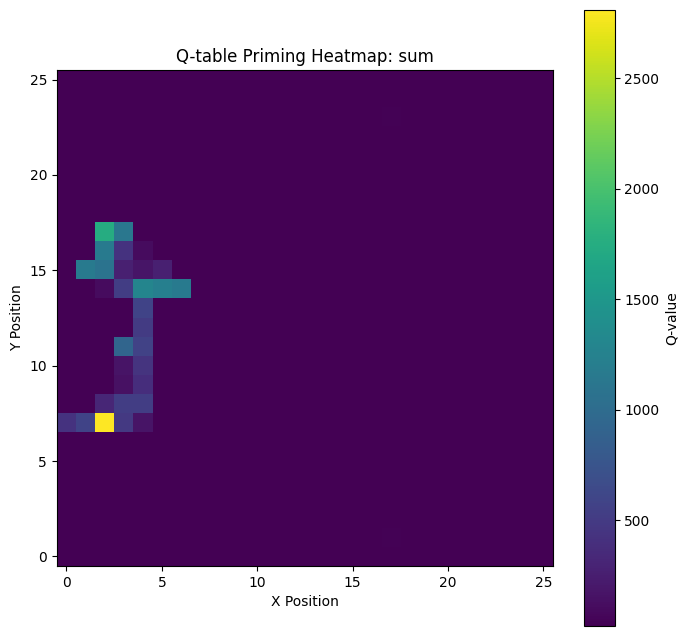

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qtable_heatmap(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    #encoding: ((((x,y)*2 + cart)*2 + items)*2 + checkout)

    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            for cart in [0, 1]:
                for items in [0, 1]:
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum() #sum of actions
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max() #max of actions
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    plt.figure(figsize=(8, 8))
    plt.imshow(collapsed.T, origin="lower", aspect="equal")
    plt.colorbar(label="Q-value")
    plt.title(f"Q-table Priming Heatmap: {mode}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

plot_qtable_heatmap(qtable=q_table, mode="sum")
